# Introduction

In this notebook, we will use a pre-trained transformer model to generate embeddings for a DNA sequence and analyze the embeddings to visualize certain features of the sequence. We will also use a Masked Language Model to predict the probabilities of nucleotides at specific positions of the sequence.

# Importing Libraries

In [35]:
import scanpy as sc
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

# Loading the Sequence

We will use a sample DNA sequence for our analysis:

In [2]:

seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

# Generating Embeddings

We will use a pre-trained transformer model to generate embeddings for the DNA sequence. We will use the "sentence-transformers/all-distilroberta-v1" model from HuggingFace for our analysis. We will first initialize the tokenizer and the model using the following code:


In [122]:
model_name = "sentence-transformers/all-distilroberta-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

We will then generate the input_ids for our sequence and pass them to the model to get the embeddings using the following code:

In [123]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 367])


tensor([    0,   347, 24592,   534, 14543, 45612,  2571,  7164,  3450, 14543])

In [124]:
model = AutoModel.from_pretrained(model_name)
model.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [125]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape
     

torch.Size([1, 367, 768])

We will also create a DataFrame from the embeddings and use StandardScaler to scale the values. We will then visualize the embeddings using a heatmap:

In [126]:

embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Position,,,,,,,,,,,,,,,,,,,,,
0,0.074412,1.323573,-0.891264,-3.112188,0.022339,-1.813904,-3.800323,1.160106,6.558417,-6.351096,...,3.014940,4.490048,-2.145029,-0.006830,-0.343810,0.245352,1.497105,-1.840106,-3.588505,2.546611
1,0.573941,-0.367207,-0.566556,-5.431694,5.507420,-1.195557,0.143168,3.784288,5.413179,-0.795175,...,4.881276,0.828377,1.248261,-2.939322,3.128012,-1.093635,0.047291,-5.312984,-4.440656,-0.552679
2,2.020340,-0.770978,0.759143,0.024908,1.883198,-0.983757,1.915235,-1.227852,-1.687315,-0.020860,...,0.238067,-1.790360,-0.616816,2.469399,-0.573302,5.275158,0.988566,-0.572733,2.719877,-0.601336
3,3.185387,3.353556,-1.245604,0.419454,1.623198,-1.276368,2.647196,0.390050,1.113944,-0.384628,...,-1.231261,0.467552,1.316339,2.191689,-0.476640,4.285216,1.894589,-0.655465,-1.289140,1.376780
4,1.639157,0.875097,-0.074669,1.245233,1.902978,-1.611899,2.638583,0.162802,0.253369,0.300301,...,-0.526644,-2.901793,-0.595841,1.069562,0.631058,2.547137,0.253856,-1.911998,1.560060,1.199072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-1.260860,-0.917127,0.163759,0.035830,0.164236,0.304121,-0.323232,-1.318471,-1.364697,-0.080699,...,-2.940683,-1.350569,-1.317297,0.487365,-0.908859,1.001651,0.993416,-0.324088,1.691424,-2.236874
363,-1.679612,-1.031444,2.076755,-0.343849,-1.612933,-1.359150,0.964263,-0.145232,-0.600911,1.085116,...,-2.601436,-1.424085,-1.509398,0.120800,0.180185,0.021380,-0.597313,0.996874,1.365466,-0.969461
364,-1.748957,-1.444121,1.723231,0.412812,-0.747486,-0.846313,0.198609,0.510272,-0.348495,-0.025823,...,-1.871768,-0.425608,-0.472993,0.536462,0.461058,1.112657,-0.261390,-1.168622,0.465910,-2.269551


<AxesSubplot: xlabel='Position', ylabel='Embedding dimension'>

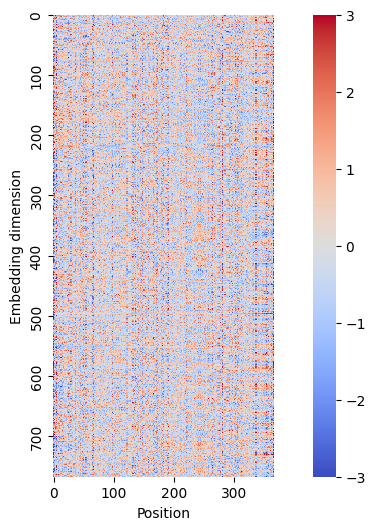

In [127]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100)

#  Predicting Nucleotide Probabilities

We will now use a Masked Language Model to predict the probabilities of nucleotides at specific positions of the sequence. We will use the same pre-trained transformer model for this analysis.

We will first initialize the model using the following code:

In [128]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_name)
model_for_mlm.eval()

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at sentence-transformers/all-distilroberta-v1 and are newly initialized: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNor

We will then use the input_ids generated earlier and pass them to the Masked Language Model to predict the logits for each position in the sequence:

In [129]:

seq[300:304]

'TTTC'

For instance in the below cell we replace the token at position 350 with the mask token to predict the probabilities of nucleotides at that position using the Masked Language Model

In [130]:
pos = 300
input_ids[0, pos] = tokenizer.mask_token_id

In [131]:

with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 367, 50265])

We can now use these logits to predict the probabilities of nucleotides (adenine, cytosine, guanine, and thymine) at a specific position (pos) in the DNA sequence using the Masked Language Model. For example, to predict the probabilities of nucleotides at position 350 to 362 in the sequence, we can use the following code:

In [132]:


nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs



array([0.3288422 , 0.25922763, 0.0083824 , 0.40354776], dtype=float32)

We can then visualize these probabilities using a bar plot:

<AxesSubplot: xlabel='nucleotide', ylabel='probability'>

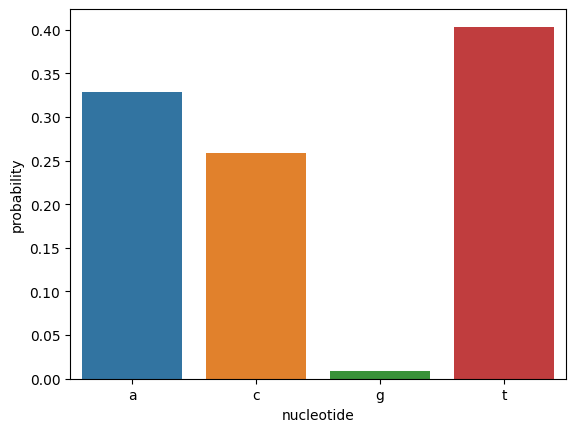

In [133]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")


# Conclusion

In this notebook, we used a pre-trained transformer model to generate embeddings for a DNA sequence and analyzed the embeddings to visualize certain features of the sequence. We also used a Masked Language Model to predict the probabilities of nucleotides at specific positions of the sequence. This notebook can be used as a starting point for further analysis of DNA sequences using pre-trained transformer models.